In [4]:
cd ..

/home/louis/other_dev/curve-infrastructure


In [1]:
import dubins
from math import pi
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

/home/louis/other_dev/curve-infrastructure/curve/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


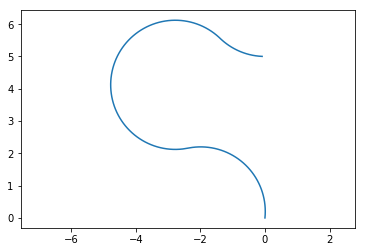

In [2]:


q0 = (0, 0, pi/2 - 0.1)
q1 = (0, 5,  0)
turning_radius = 2
step_size = 0.1

path = dubins.shortest_path(q0, q1, turning_radius)
configurations, _ = path.sample_many(step_size)
x = [coords[0] for coords in configurations]
y = [coords[1] for coords in configurations]
plt.plot(x,y)

plt.axes().set_aspect('equal', 'datalim')


plt.show()


In [5]:
import routefinder.paths
import folium

In [6]:
q0 = (50.294319, -5.136642, 2.6)
q1 = (50.300954, -5.112182, 2.7)

import pyproj
wgs84=pyproj.Proj("+init=EPSG:4326", preserve_units = True)
osgb36=pyproj.Proj("+init=EPSG:27700", preserve_units = True)


x0 = pyproj.transform(wgs84, osgb36, q0[1], q0[0]) + (pi - q0[2] ,)
x1 = pyproj.transform(wgs84, osgb36, q1[1], q1[0]) + (pi - q1[2] ,)
path = dubins.shortest_path(x0 , x1, 200)
configurations, _ = path.sample_many(40)

In [10]:
map = folium.Map(location=(50.297031, -5.123636), zoom_start=15)

folium.PolyLine(ll_path_switch, color="red", weight=2.5, opacity=1).add_to(map)
display(map)

In [42]:
x0 = pyproj.transform(wgs84, osgb36,   -5.129413, 50.299305)
x1 = pyproj.transform(wgs84, osgb36,   -5.127096, 50.296687)
y0 = np.array(x0)
y1 = np.array(x1)
n = 10
mid_points = [y0 + (y1 - y0)* i/n for i in range(n)]

In [46]:
map = folium.Map(location=(50.297031, -5.123636), zoom_start=15)
for point in mid_points:
    lon_lat = pyproj.transform(osgb36, wgs84, point[0], point[1])
    mid_lat_lon = (lon_lat[1], lon_lat[0], 2.7)
    ll_path_1 = routefinder.paths.get_geo_dubins(q0,mid_lat_lon,400,10)
    ll_path_2 = routefinder.paths.get_geo_dubins(mid_lat_lon,q1,400,10)
    folium.PolyLine(ll_path_1 + ll_path_2, color="red", weight=2, opacity=0.7).add_to(map)
display(map)

In [16]:
mid_points

[array([176691.43817282,  48525.44829043]),
 array([176868.70653684,  48591.88993457]),
 array([177045.97490087,  48658.33157871]),
 array([177223.24326489,  48724.77322285]),
 array([177400.51162892,  48791.21486699]),
 array([177577.77999294,  48857.65651112]),
 array([177755.04835697,  48924.09815526]),
 array([177932.31672099,  48990.5397994 ]),
 array([178109.58508501,  49056.98144354]),
 array([178286.85344904,  49123.42308768])]